## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
c:\users\user\.conda\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\.conda\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\.conda\envs\tf113\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\user\.conda\envs\tf113\lib\site-packages\tensorflo

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "batch_size %s" % str(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 19s 376us/step - loss: 1.5542 - accuracy: 0.4482 - val_loss: 1.5151 - val_accuracy: 0.4601
Epoch 5/30
50000/50000 [==============================] - 19s 375us/step - loss: 1.5319 - accuracy: 0.4547 - val_loss: 1.4809 - val_accuracy: 0.4666
Epoch 6/30
50000/50000 [==============================] - 19s 376us/step - loss: 1.4927 - accuracy: 0.4676 - val_loss: 1.5116 - val_accuracy: 0.4531
Epoch 7/30
50000/50000 [==============================] - 19s 375us/step - loss: 1.4821 - accuracy: 0.4732 - val_loss: 1.4453 - val_accuracy: 0.4851
Epoch 8/30
50000/50000 [==============================] - 19s 378us/step - loss: 1.4555 - accuracy: 0.4834 - val_loss: 1.5176 - val_accuracy: 0.4636
Epoch 9/30
50000/50000 [==============================] - 19s 376us/step - loss: 1.4259 - accuracy: 0.4933 - val_loss: 1.4599 - val_accuracy: 0.4811
Epoch 10/30
50000/50000 [==============================] - 19s 377us/step - loss: 1.4086 - accuracy: 0.4981 - val_los

50000/50000 [==============================] - 10s 197us/step - loss: 1.0965 - accuracy: 0.6121 - val_loss: 1.4397 - val_accuracy: 0.5000
Epoch 20/30
50000/50000 [==============================] - 10s 197us/step - loss: 1.0851 - accuracy: 0.6166 - val_loss: 1.4162 - val_accuracy: 0.5124
Epoch 21/30
50000/50000 [==============================] - 10s 198us/step - loss: 1.0693 - accuracy: 0.6207 - val_loss: 1.4896 - val_accuracy: 0.4943
Epoch 22/30
50000/50000 [==============================] - 10s 198us/step - loss: 1.0560 - accuracy: 0.6242 - val_loss: 1.5578 - val_accuracy: 0.4830
Epoch 23/30
50000/50000 [==============================] - 10s 198us/step - loss: 1.0433 - accuracy: 0.6302 - val_loss: 1.4689 - val_accuracy: 0.5078
Epoch 24/30
50000/50000 [==============================] - 10s 199us/step - loss: 1.0296 - accuracy: 0.6345 - val_loss: 1.4366 - val_accuracy: 0.5044
Epoch 25/30
50000/50000 [==============================] - 10s 198us/step - loss: 1.0173 - accuracy: 0.6371 - va

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 73us/step - loss: 1.8583 - accuracy: 0.3626 - val_loss: 1.7951 - val_accuracy: 0.3592
Epoch 2/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.5397 - accuracy: 0.4594 - val_loss: 1.6756 - val_accuracy: 0.4098
Epoch 3/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.4423 - accuracy: 0.4965 - val_loss: 1.5349 - val_accuracy: 0.4578
Epoch 4/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.3696 - accuracy: 0.5190 - val_loss: 1.5722 - val_accuracy: 0.4450
Epoch 5/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.3118 - accuracy: 0.5402 - val_loss: 1.4839 - val_accuracy: 0.4744
Epoch 6/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.2605 - accuracy: 0.5596 - val_loss: 1.5386 - val_accuracy: 0.4567
Epoch 7/30
50000/50000 [==============================] - 3s 55us/st

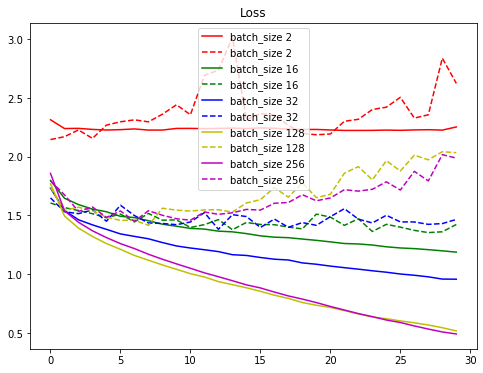

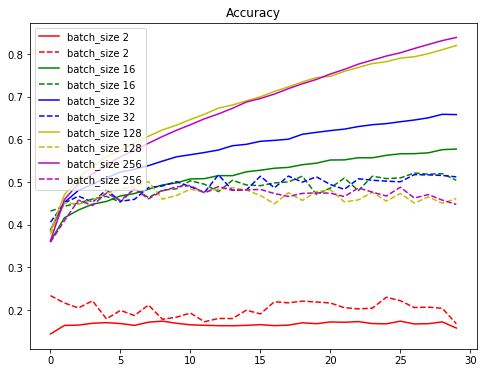

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'#eeefff','#00efff']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()